# COGS 118B Final Project

## Pre-reqs

In [1]:
# required imports

import pandas as pd
import matplotlib.pyplot as plt

## Exploring the Data

In [2]:
# import dataset and display it

data = pd.read_csv('data.csv', encoding='cp1252').drop('Index', axis=1)
original_size = len(data)

data

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [3]:
# check for missing data

print(f'There are {data.isnull().sum().sum()} missing values.')

There are 0 missing values.


The following features from the dataset will be used for clustering:

1 - Beats Per Minute (BPM)
2 - Energy
3 - Danceability
4 - Loudness (dB)
5 - Liveness
6 - Valence
7 - Acousticness
8 - Speechiness


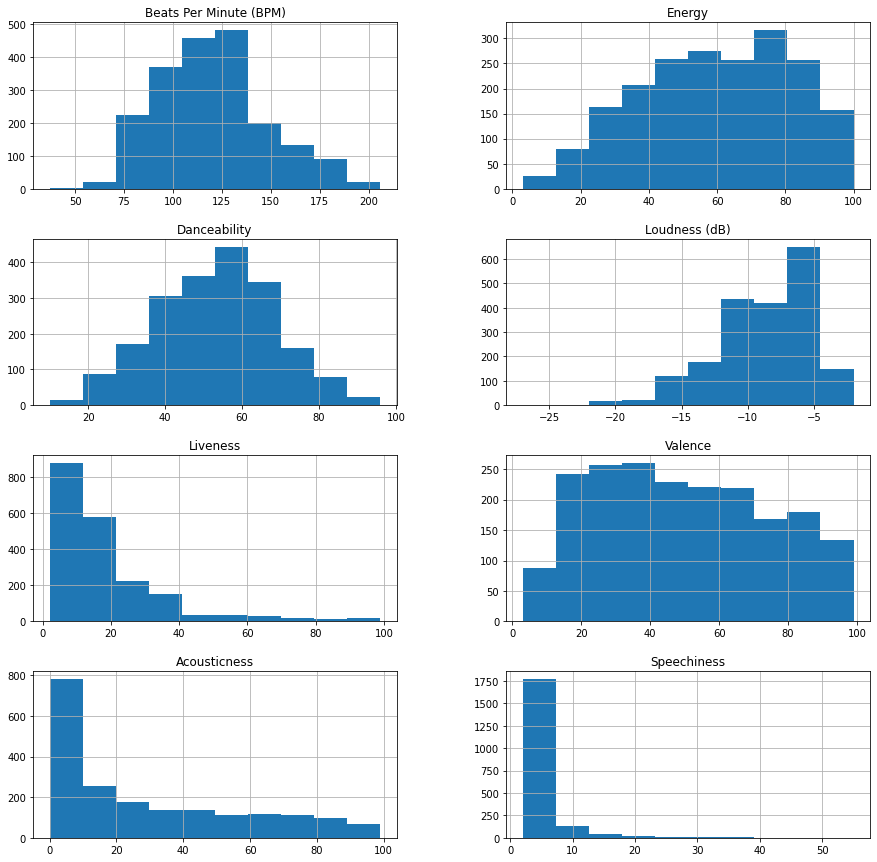

In [4]:
# extract audio features relevant to clustering and display them with their distribution

features = list(data.columns[4:13])
del features[6]

print('The following features from the dataset will be used for clustering:\n')

for i, feature in enumerate(features):
    print(f'{i + 1} - {feature}')
    
_, axes = plt.subplots(4, 2, figsize=(15, 15))
_ = data.hist(column=features, ax=axes)

In [5]:
# extract the genres and display them

def get_genres():
    return sorted(data['Top Genre'].unique(), reverse = True, 
                  key = lambda genre: len(data.loc[data['Top Genre'] == genre]))

def display_genres():
    genres = get_genres()
    
    print(f'Displaying {len(genres)} genres.\n')
    
    longest_length = len(max(genres, key = len))
    
    print(f'{"idx":{3}} | {"genres":^{longest_length}} | {"# entries":^{3}}\n' + '-' * (longest_length + 18))
    
    for i, genre in enumerate(genres):
        num = len(data.loc[data['Top Genre'] == genre])
        print(f'{i + 1:<{3}} | {genre:{longest_length}} | {num:<{9}}')
    
display_genres()

Displaying 149 genres.

idx |           genres            | # entries
---------------------------------------------
1   | album rock                  | 413      
2   | adult standards             | 123      
3   | dutch pop                   | 88       
4   | alternative rock            | 86       
5   | dance pop                   | 83       
6   | dutch indie                 | 75       
7   | alternative metal           | 70       
8   | dance rock                  | 52       
9   | classic rock                | 51       
10  | dutch cabaret               | 51       
11  | modern rock                 | 49       
12  | glam rock                   | 49       
13  | pop                         | 47       
14  | art rock                    | 40       
15  | permanent wave              | 38       
16  | british invasion            | 36       
17  | irish rock                  | 34       
18  | british soul                | 31       
19  | europop                     | 27       
20  | clas

## Preparing the Data

In [6]:
# 149 genres leads to too many clusters. we reduce this number in two ways:
# 1: group similar genres together (ie: 'album rock' and 'alternative rock' are grouped under 'rock')
# 2: only pick the most represented genres in the dataset

# 1
def group_genres(groups):
    for group in groups:
        data.loc[[group in genre for genre in data['Top Genre']], 'Top Genre'] = group

group_genres(['rock', 'pop', 'indie', 'hip hop', 'soul', 'metal', 'country', 'folk', 'jazz', 'elec', 'dance'])

# 2 (only keep genres with 10 or more songs)
top_genres = [genre for genre in get_genres() if len(data.loc[data['Top Genre'] == genre]) > 9]
data = data[data['Top Genre'].isin(top_genres)]

display_genres()

print(f'\n{original_size - len(data)} rows were removed from the dataset keeping only songs that belong ' +
       'in a genre with 10 or more songs.')

data

Displaying 20 genres.

idx |      genres      | # entries
----------------------------------
1   | rock             | 857      
2   | pop              | 388      
3   | adult standards  | 123      
4   | metal            | 93       
5   | indie            | 79       
6   | dutch cabaret    | 51       
7   | soul             | 45       
8   | permanent wave   | 38       
9   | british invasion | 36       
10  | hip hop          | 29       
11  | dance            | 19       
12  | folk             | 19       
13  | disco            | 18       
14  | neo mellow       | 17       
15  | funk             | 13       
16  | dutch americana  | 12       
17  | country          | 12       
18  | mellow gold      | 11       
19  | big beat         | 11       
20  | carnaval limburg | 10       

113 rows were removed from the dataset keeping only songs that belong in a genre with 10 or more songs.


,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,Summertime,Louis Armstrong,adult standards,1958,168,7,17,-21,14,10,298,92,3,66
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,rock,1959,168,80,53,-9,31,97,162,74,7,74
